In [1]:
#Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#assigming index id to movie_name and rearranging df so that it's the first column
movie = pd.read_csv('Final_Data_Template.csv',encoding='latin-1')
movie['id'] = movie.index
movie = movie[['id'] + movie.columns[:-1].tolist()]
movie_final = movie.drop(['movie_name'], axis=1)
movie_final.head(3)

,id,production_year,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,...,350k_Movies.actor3_name,350k_Movies.actor3_gender,350k_Movies.actor4_name,350k_Movies.actor4_gender,350k_Movies.actor5_name,350k_Movies.actor5_gender,350k_Movies.director_name,350k_Movies.producer_name,350k_Movies.screeplay_name,350k_Movies.editor_name
0,0,2006,45000000,36895141,28700000,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Action,...,David Morse,2,Jenna Stern,0,David Zayas,2,Richard Donner,Randall Emmett,Richard Wenk,Steve Mirkovich
1,1,2006,35000000,7459300,34604805,PG-13,Contemporary Fiction,Based on Fiction Book/Short Story,Live Action,Drama,...,Albert Finney,0,Tom Hollander,2,Abbie Cornish,1,Ridley Scott,Ridley Scott,none,Dody Dorn
2,2,2006,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,...,Virginia Madsen,1,Woody Harrelson,2,Garrison Keillor,2,Robert Altman,Robert Altman,Garrison Keillor,Jacob Craycroft


In [3]:
#Got dummies - 14169 columns...
movie_final = pd.get_dummies(movie_final)
movie_final.head(3)

,id,production_year,production_budget,domestic_box_office,international_box_office,sequel,running_time,350k_Movies.popularity,350k_Movies.revenue,350k_Movies.runtime,...,350k_Movies.editor_name_William Steinkamp,350k_Movies.editor_name_William Yeh,350k_Movies.editor_name_Wyatt Jones,350k_Movies.editor_name_Wyatt Smith,350k_Movies.editor_name_Yann HervÃ©,350k_Movies.editor_name_Yves Langlois,350k_Movies.editor_name_Zach Staenberg,350k_Movies.editor_name_Zachary Stuart-Pontier,350k_Movies.editor_name_Zene Baker,350k_Movies.editor_name_none
0,0,2006,45000000,36895141,28700000,0,105,2.815345,65664721,105,...,0,0,0,0,0,0,0,0,0,0
1,1,2006,35000000,7459300,34604805,0,118,0.915594,42064105,118,...,0,0,0,0,0,0,0,0,0,0
2,2,2006,10000000,20342852,6373339,0,105,1.272709,0,105,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#created dataframe with correlations for all columns 
name = []
correlation = []
for movie in movie_final:
    name.append(movie)
    correlation.append(movie_final['domestic_box_office'].corr(movie_final[movie]))
correlation_df = pd.DataFrame({'name': name, 'correlation': correlation})[['name','correlation']]
positive_df = correlation_df.sort_values(by=['correlation'], ascending=False)
positive_df.head(10)

,name,correlation
3,domestic_box_office,1.000000
4,international_box_office,0.855784
8,350k_Movies.revenue,0.809459
2,production_budget,0.697835
11,350k_Movies.vote_count,0.667864
32,creative_type_Super Hero,0.371415
7,350k_Movies.popularity,0.365976
5,sequel,0.359444
54,production_method_Animation/Live Action,0.310557
63,genre_Adventure,0.288353


In [5]:
#making a list based off the top correlated columns to feed into regression
top = positive_df['name'].values.tolist()[:50]
top.remove('domestic_box_office')
top.remove('international_box_office')
top.remove('350k_Movies.revenue')
top[:5]

['production_budget',
 '350k_Movies.vote_count',
 'creative_type_Super Hero',
 '350k_Movies.popularity',
 'sequel']

In [6]:
#Copy Paste Scikit Learn Regression from here on..reshaped data
X = movie_final[top]
y = movie_final["domestic_box_office"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1435, 47) (1435, 1)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\ahmed_oz98996\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


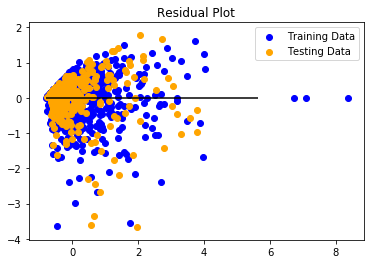

In [8]:
#scaled data code
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [9]:
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4263529285625431, R2: 0.6345895783618591


In [10]:
r2 = model.score(X_train_scaled, y_train_scaled)

print(f"R2: {r2}")

R2: 0.7220248129216387


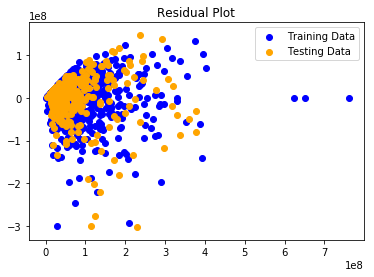

In [11]:
#not scaled data code
model = LinearRegression()
model.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [12]:
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 2912272415867098.0, R2: 0.6346292238901534


In [13]:
r2 = model.score(X_train, y_train)

print(f"R2: {r2}")

R2: 0.7220359115242657


In [14]:
#EXTRA UNUSED CODE

# #correlations for all numeric columns - might help see which columns we end up using in regression model
# movie_int = movie_final.select_dtypes(include=['int64'])
# for movie in movie_int:
#     print((movie) + "  "+(str(movie_final['domestic_box_office'].corr(movie_final[movie]))))

# #correlations for a couple of the missed columns 
# movie_float = movie_final.select_dtypes(include=['float64'])
# for movie in movie_float:
#     print((movie) + "  "+(str(movie_final['domestic_box_office'].corr(movie_final[movie]))))

# #correlations for all categorical columns
# movie_strings = movie_final.select_dtypes(include=['object']).head(1)
# list(movie_strings.columns.values)

# movie_final.rating = pd.Categorical(movie_final.rating).codes
# movie_final.creative_type = pd.Categorical(movie_final.creative_type).codes
# movie_final.source = pd.Categorical(movie_final.source).codes
# movie_final.production_method = pd.Categorical(movie_final.production_method).codes
# movie_final.genre = pd.Categorical(movie_final.genre).codes

# #Assigned column names to list to so that inputting column names is more dynamic(see next cell)
# x_names = list(movie_final.columns.values)
# x_names.remove('domestic_box_office')
# x_names.remove('international_box_office')
# x_names.remove('id')
# x_names.remove('350k_Movies.revenue')
# x_names